We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [85]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-08-02 16:48:45--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.78, 13.227.223.117, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.78|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [86]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [87]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-08-02    2      8  2020      0       0             Afghanistan    AF   
1 2020-08-01    1      8  2020    168      12             Afghanistan    AF   
2 2020-07-31   31      7  2020     71       0             Afghanistan    AF   
3 2020-07-30   30      7  2020      0       0             Afghanistan    AF   
4 2020-07-29   29      7  2020    103       1             Afghanistan    AF   
5 2020-07-28   28      7  2020    105       1             Afghanistan    AF   
6 2020-07-27   27      7  2020    106      10             Afghanistan    AF   
7 2020-07-26   26      7  2020    121      13             Afghanistan    AF   
8 2020-07-25   25      7  2020    108      35             Afghanistan    AF   
9 2020-07-24   24      7  2020     13       0             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           3.703825           
1                                           3.735369           
2                                           3.869432           
3                                           3.882576           
4                                           4.550263           
5                                           5.028685           
6                                           4.763187           
7                                           4.484546           
8                                           4.389913           
9                                           5.309955

Last check of our source dataframe.

In [88]:
df.count()

dateRep                                                       33686
day                                                           33686
month                                                         33686
year                                                          33686
cases                                                         33686
deaths                                                        33686
countriesAndTerritories                                       33686
geoId                                                         33686
countryterritoryCode                                          33622
popData2019                                                   33622
continentExp                                                  33686
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    30905
dtype: int64

We pivot to a country by column format.

In [89]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                             \
geoId         AD     AE     AF   AG   AI     AL     AM    AO      AR     AT   
dateRep                                                                       
2019-12-31   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
...          ...    ...    ...  ...  ...    ...    ...   ...     ...    ...   
2020-07-29   0.0  369.0  103.0  0.0  0.0  117.0  308.0  18.0  4890.0  132.0   
2020-07-30  11.0  375.0    0.0  5.0  0.0  108.0  259.0  50.0  5939.0  164.0   
2020-07-31   4.0  585.0   71.0  0.0  0.0   92.0  354.0  78.0  5641.0  163.0   
2020-08-01   3.0    0.0  168.0  0.0  0.0   79.0  291.0  31.0  6377.0   89.0   
2020-08-02   0.0  254.0    0.0  0.0  0.0  120.0  209.0   5.0  5929.0  126.0   

            ... deaths                                                    
geoId       ...     VC   VE   VG   VI   VN    XK   YE     ZA    ZM    ZW  
dateRep     ...                                                           
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN   NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN   NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN   NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN   NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN   NaN  
...         ...    ...  ...  ...  ...  ...   ...  ...    ...   ...   ...  
2020-07-29  ...    0.0  5.0  0.0  1.0  0.0   7.0  1.0  190.0   2.0   4.0  
2020-07-30  ...    0.0  0.0  0.0  0.0  0.0   4.0  1.0  240.0   4.0   1.0  
2020-07-31  ...    0.0  7.0  0.0  0.0  0.0  16.0  2.0  315.0   3.0  12.0  
2020-08-01  ...    0.0  6.0  0.0  0.0  3.0   0.0  6.0  193.0   2.0  14.0  
2020-08-02  ...    0.0  5.0  0.0  0.0  2.0   0.0  1.0  148.0  14.0   2.0  

[216 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [90]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-07-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-07-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-07-31   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-01   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-02   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-07-29 NaN  NaN NaN NaN NaN NaN NaN  
2021-07-30 NaN  NaN NaN NaN NaN NaN NaN  
2021-07-31 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-01 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-02 NaN  NaN NaN NaN NaN NaN NaN  

[581 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [91]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    581.000000
mean     290.000000
std      167.864529
min        0.000000
25%      145.000000
50%      290.000000
75%      435.000000
max      580.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [92]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [93]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for Serbia (RS) with population 6963764
Minimum number of cases is 10
Wave 0 beta 23.586 with mu 123 from  80 to 106 for 25132
Wave 1 beta  3.133 with mu 102 from  98 to 106 for 434
--- no data left
Running multiple wave analysis for Israel (IL) with population 8519373
Minimum number of cases is 10
Wave 0 beta 12.276 with mu  97 from  84 to 122 for 17868
Wave 1 beta 39.073 with mu 233 from 169 to 215 for 234427
Wave 2 beta  3.126 with mu 199 from 198 to 210 for 2317
--- no data left
Running multiple wave analysis for United_States_of_America (US) with population 329064917
Minimum number of cases is 329
Wave 0 beta 15.637 with mu 106 from  83 to 115 for 1341681
Wave 1 beta 19.681 with mu 144 from 127 to 152 for 820730
Wave 2 beta 34.389 with mu 215 from 162 to 215 for 6113384
Wave 3 beta  2.790 with mu 200 from 198 to 208 for 49837
--- no data left
Running multiple wave analysis for United_Kingdom (UK) with population 66647112
Minimum number of cases is 67

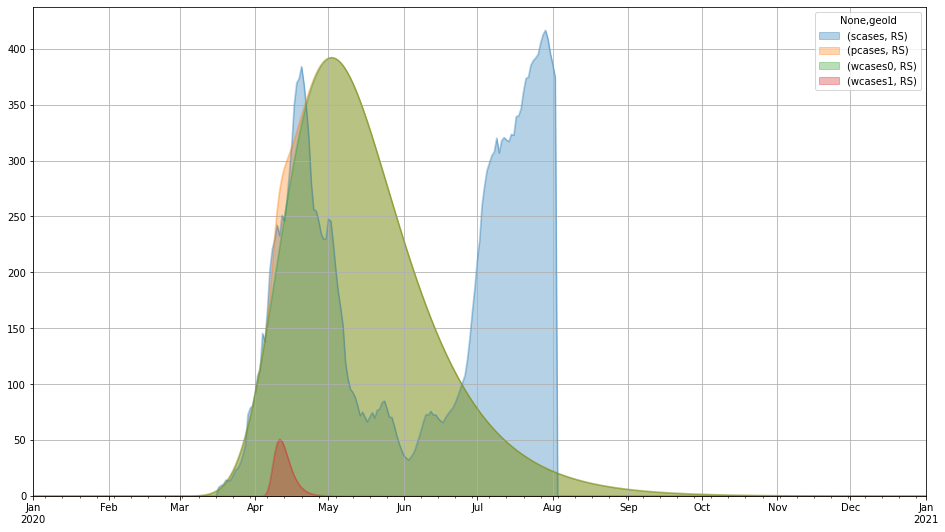

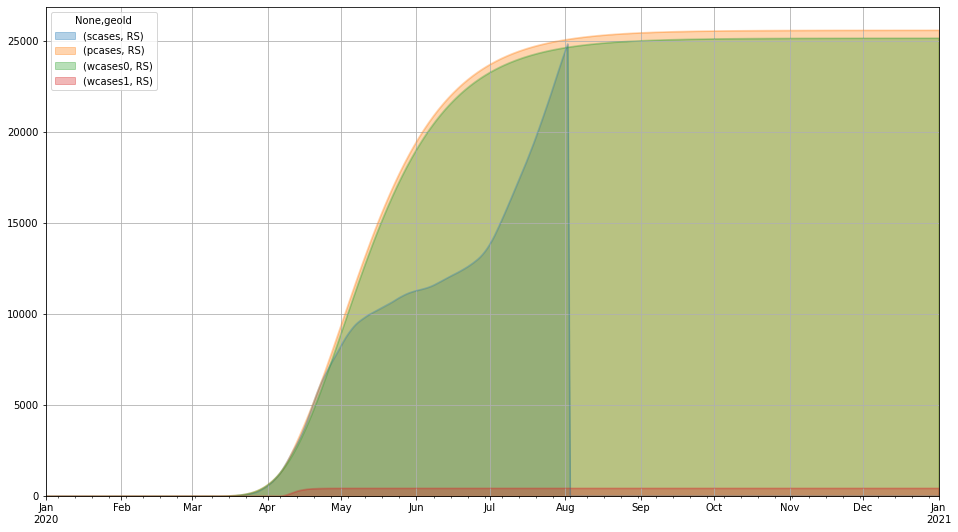

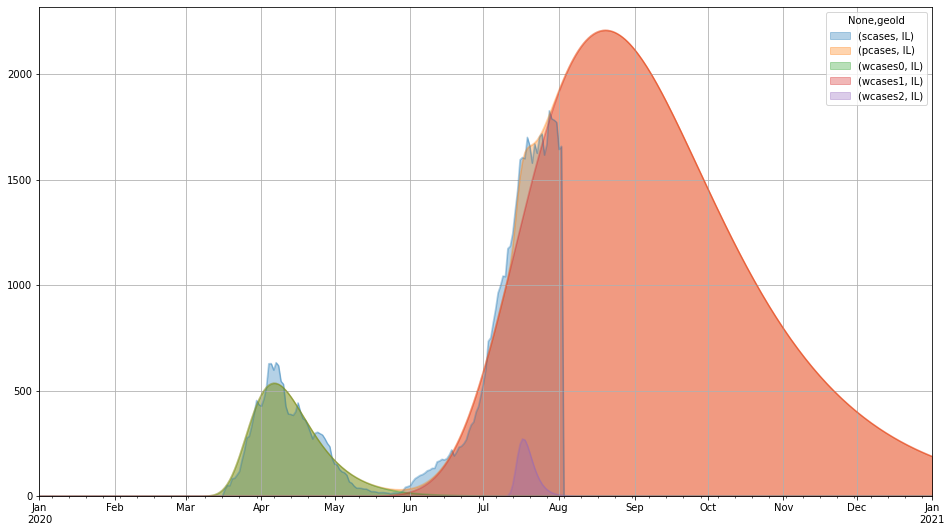

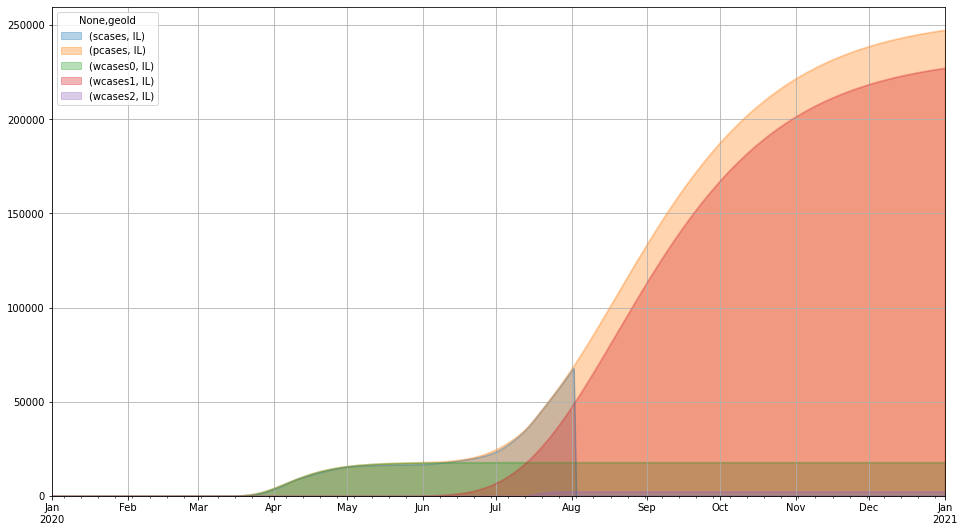

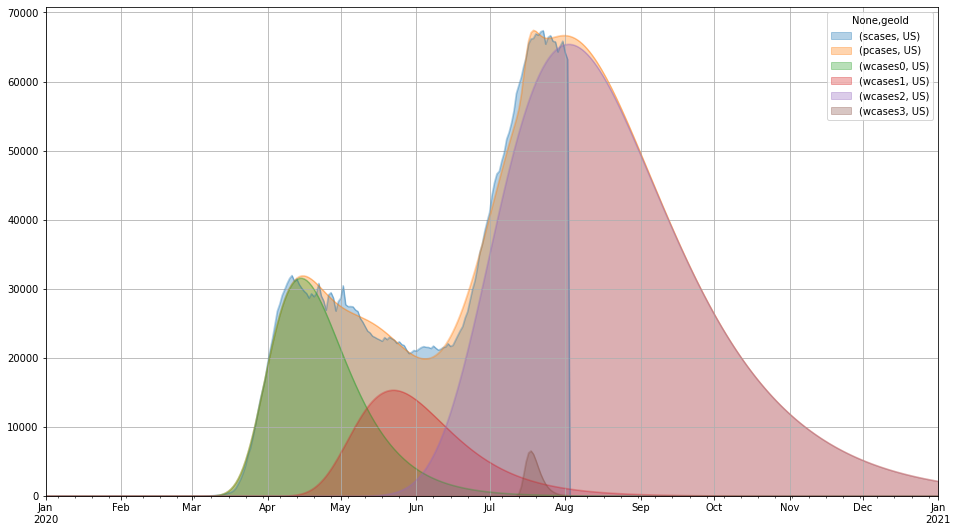

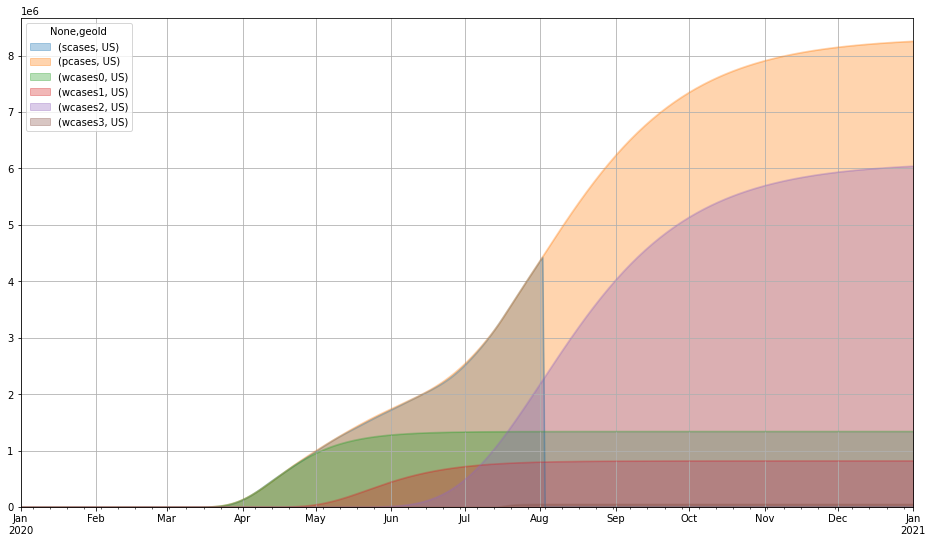

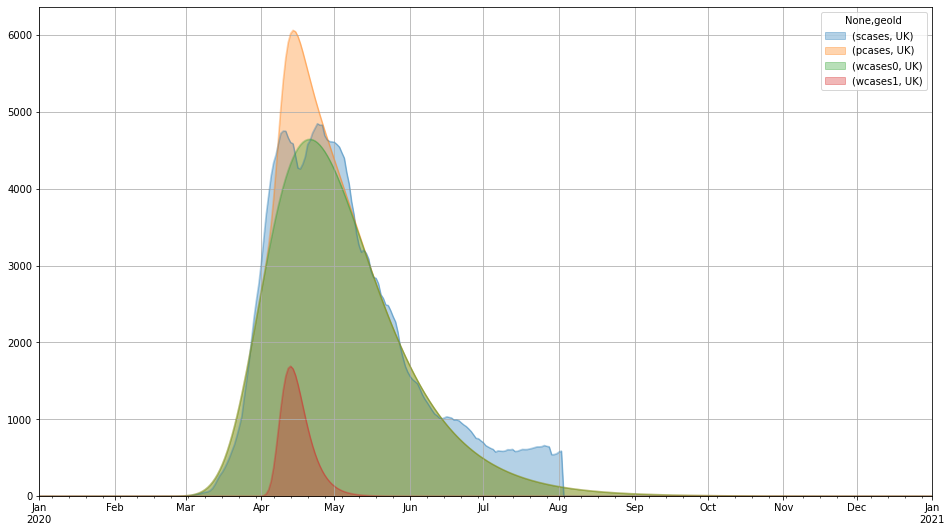

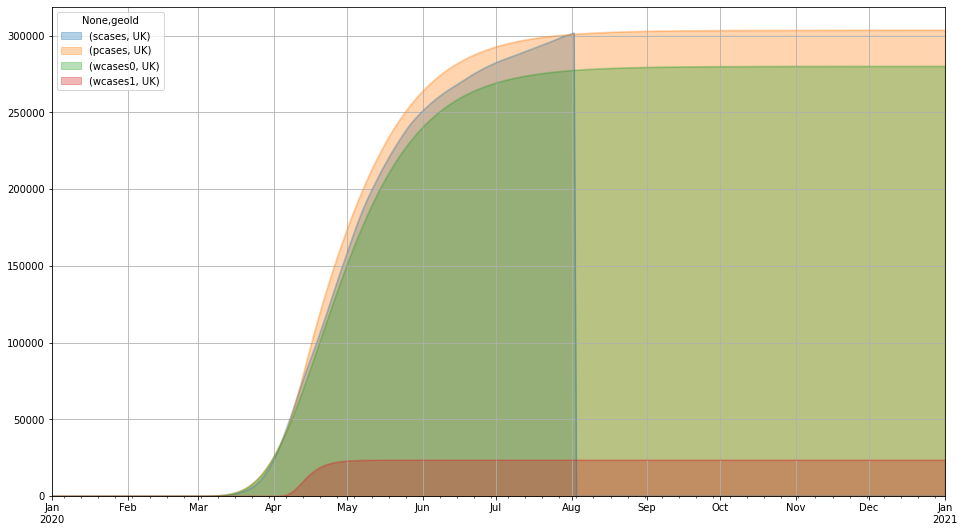

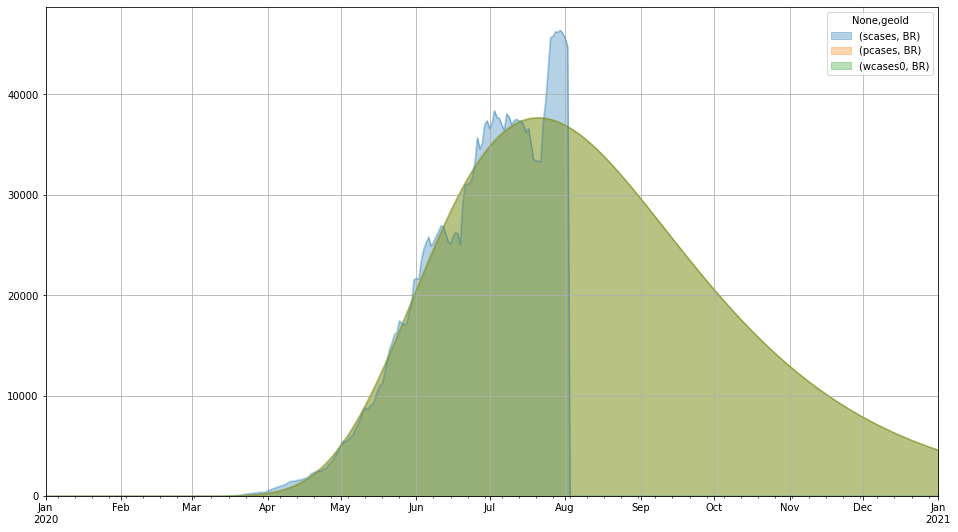

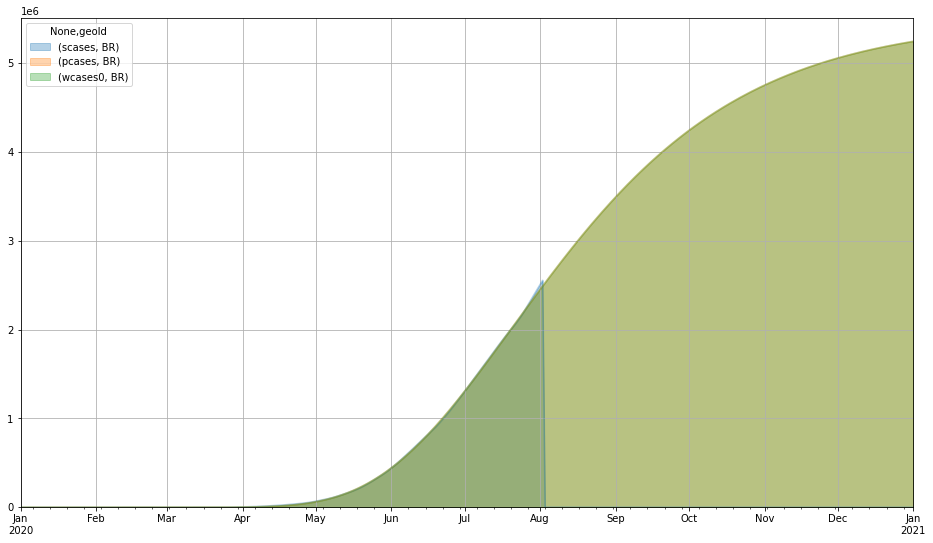

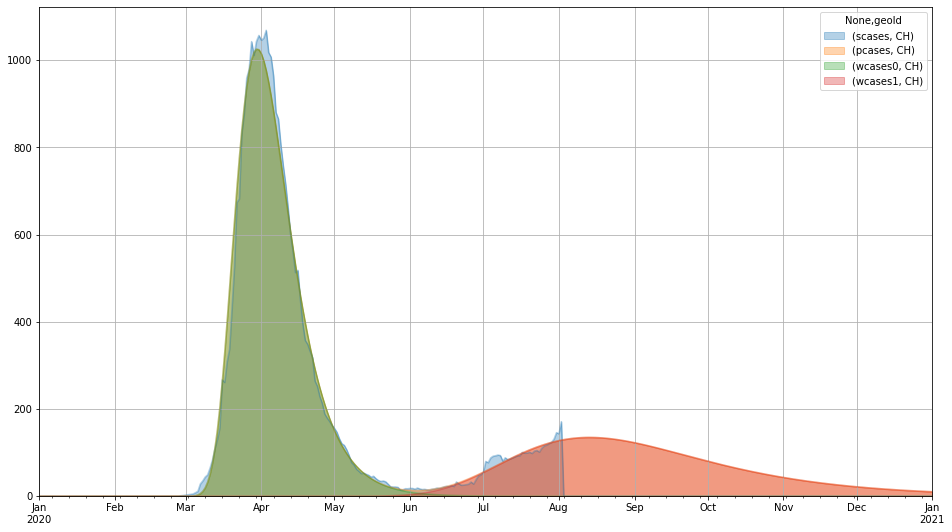

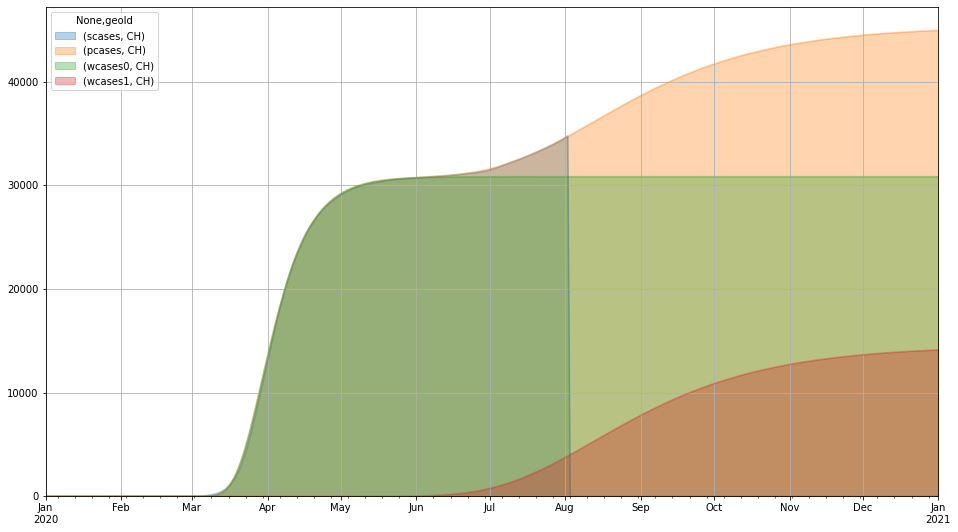

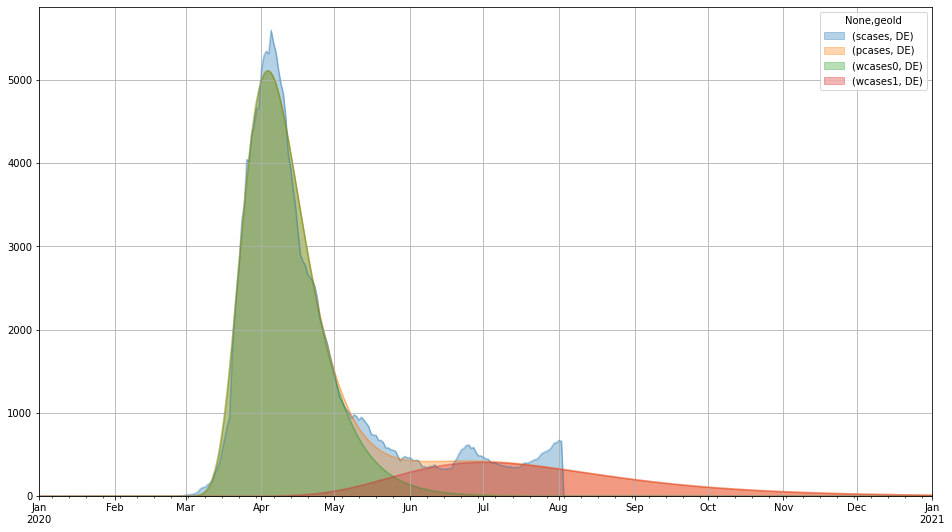

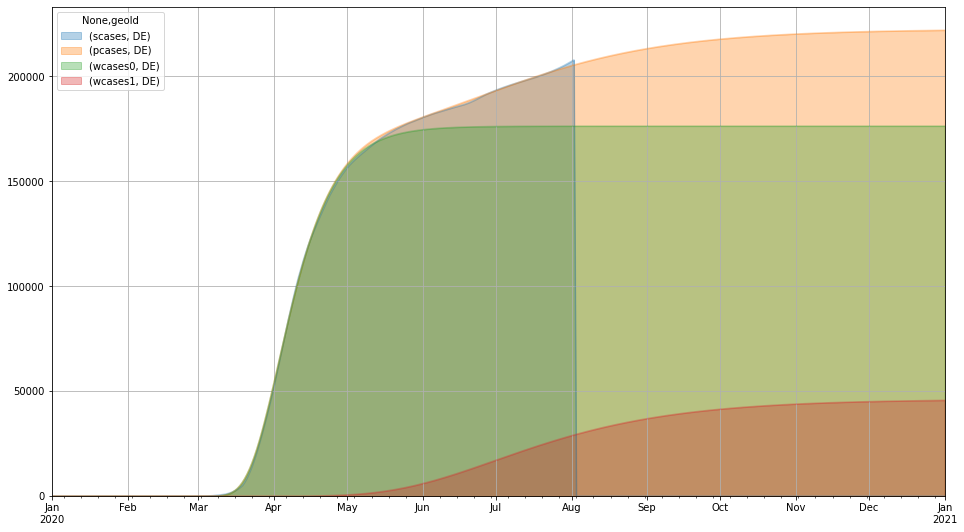

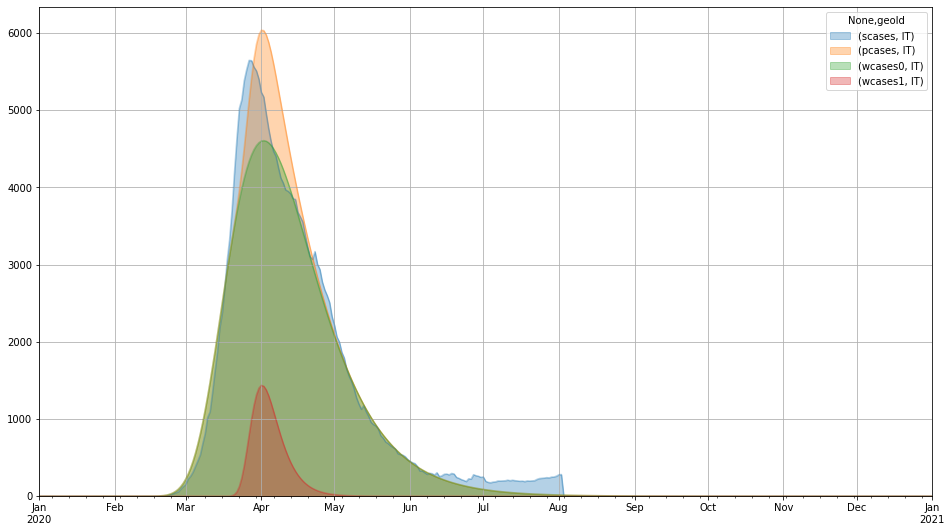

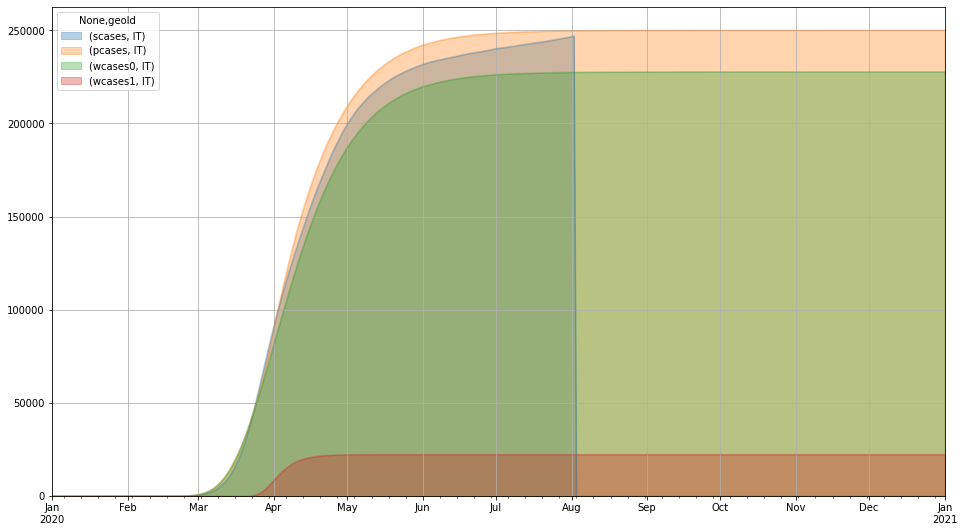

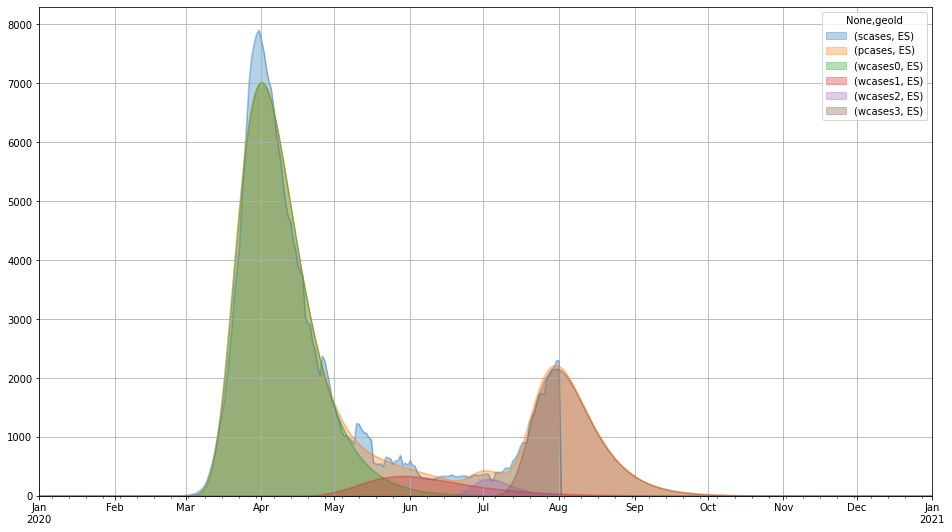

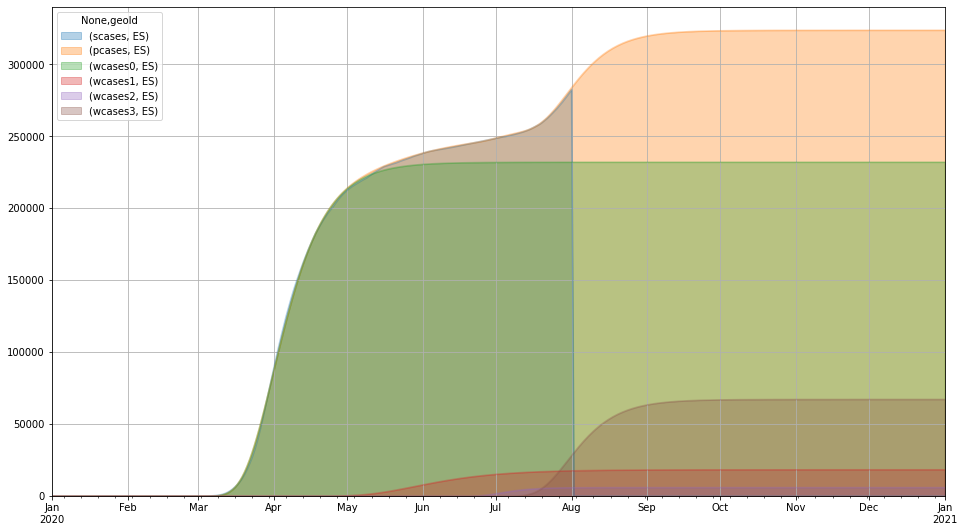

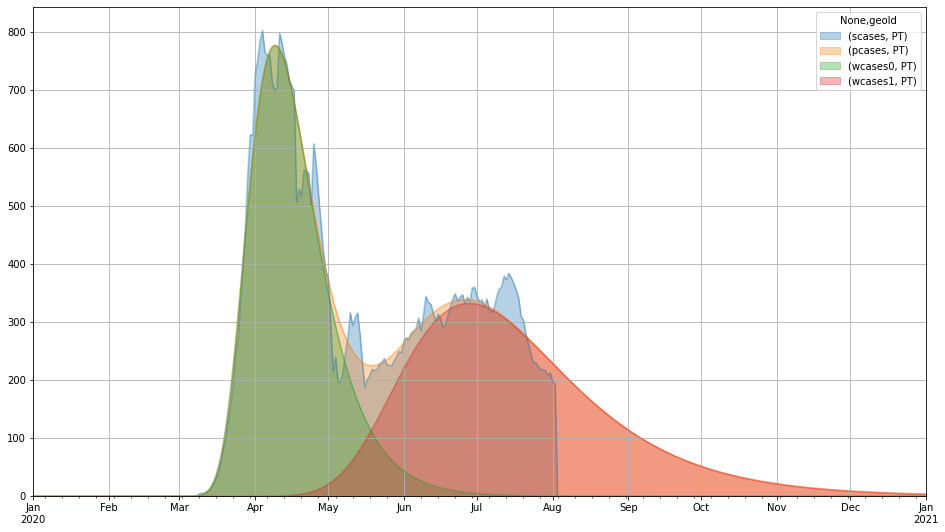

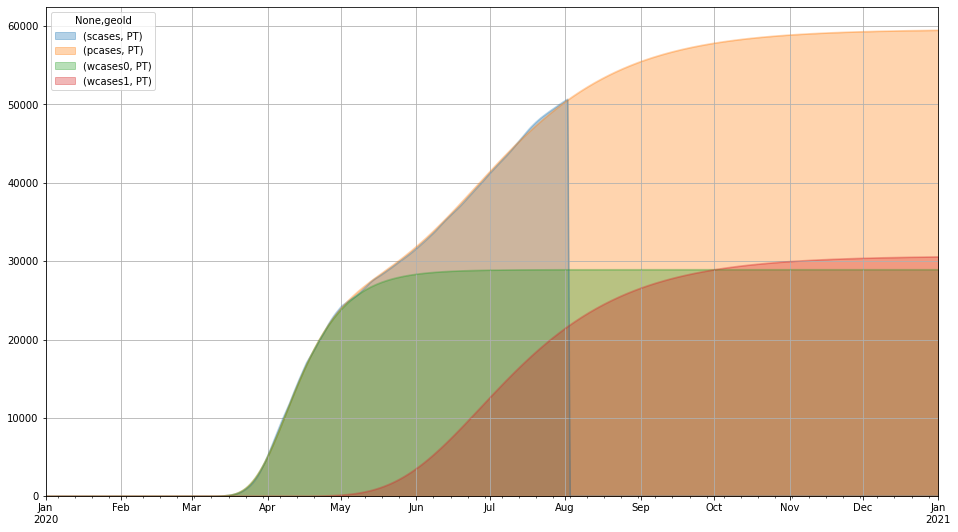

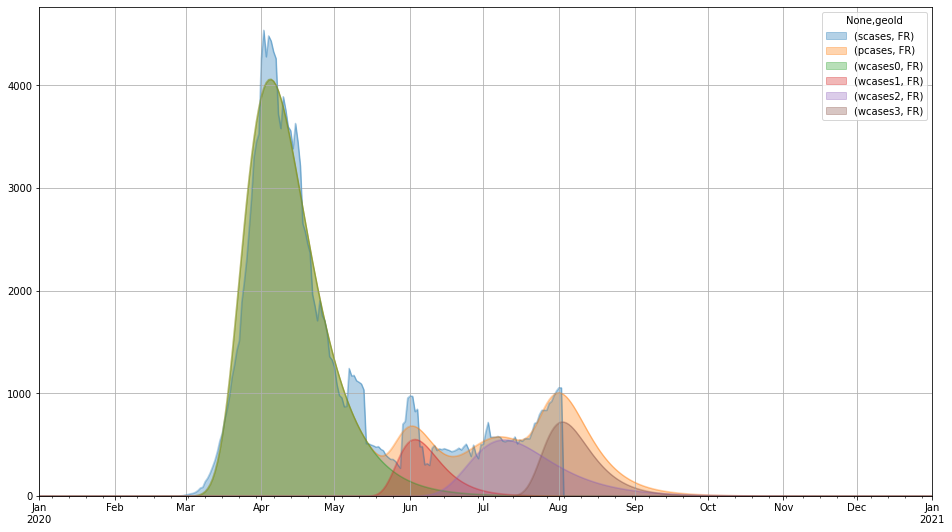

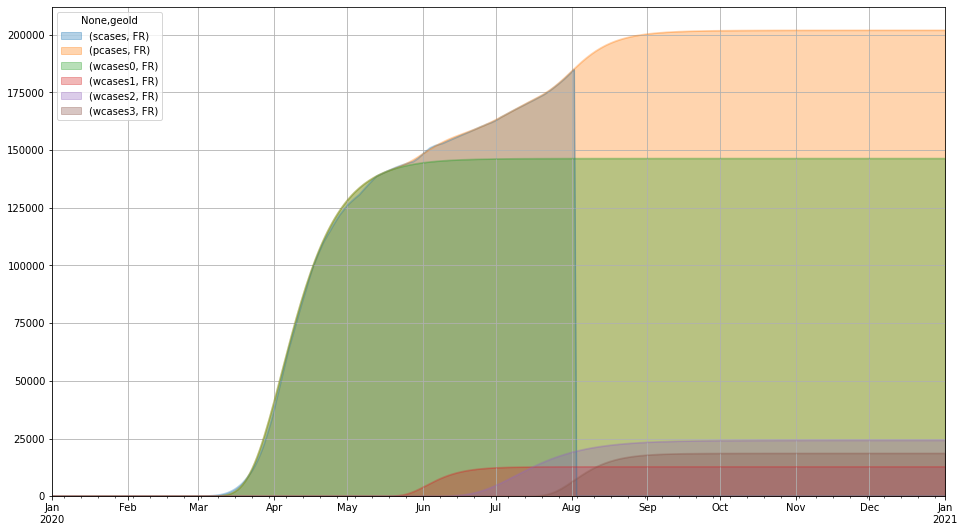

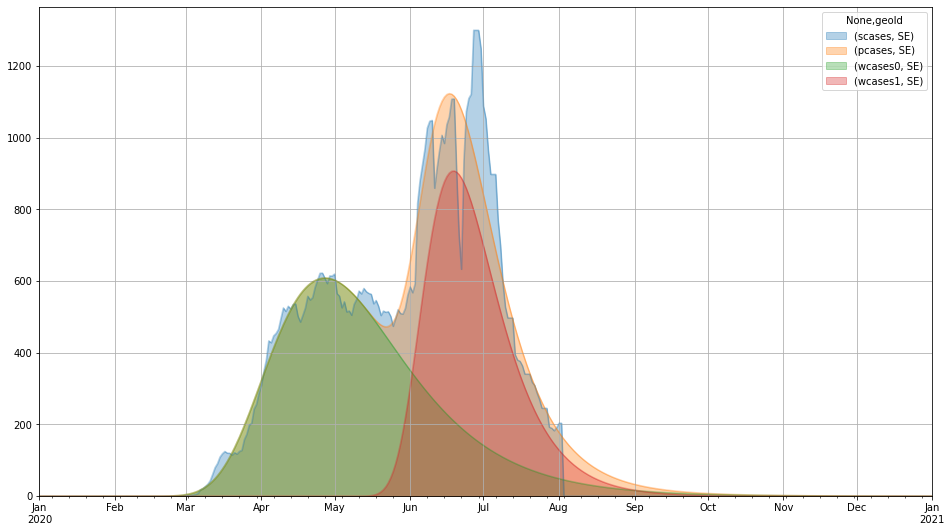

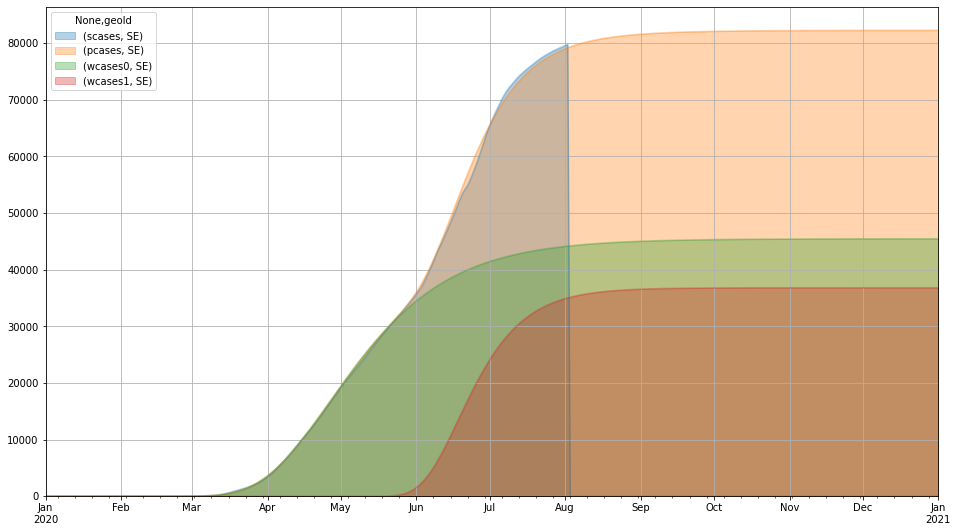

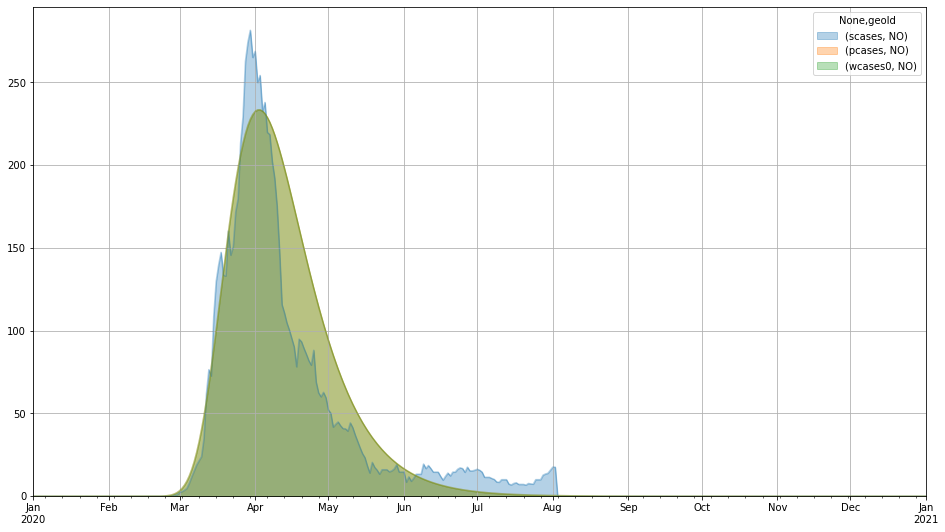

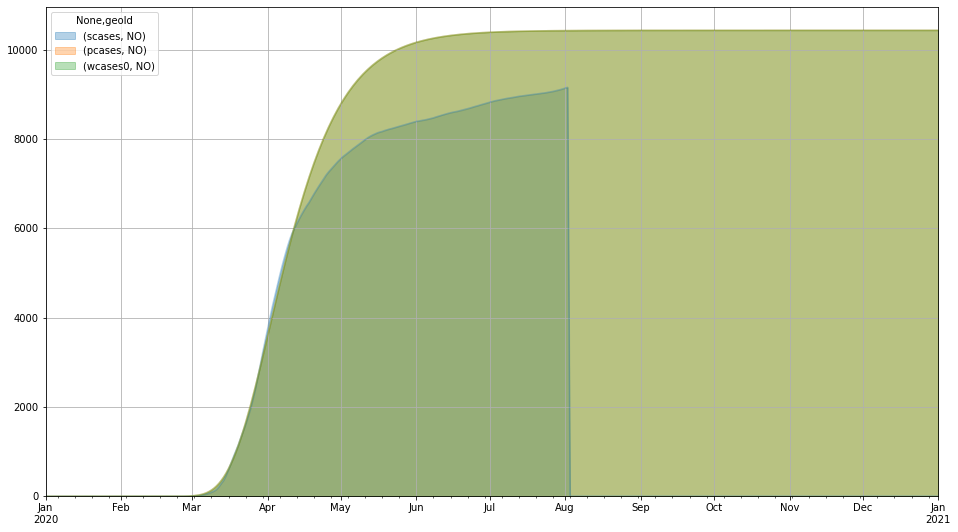

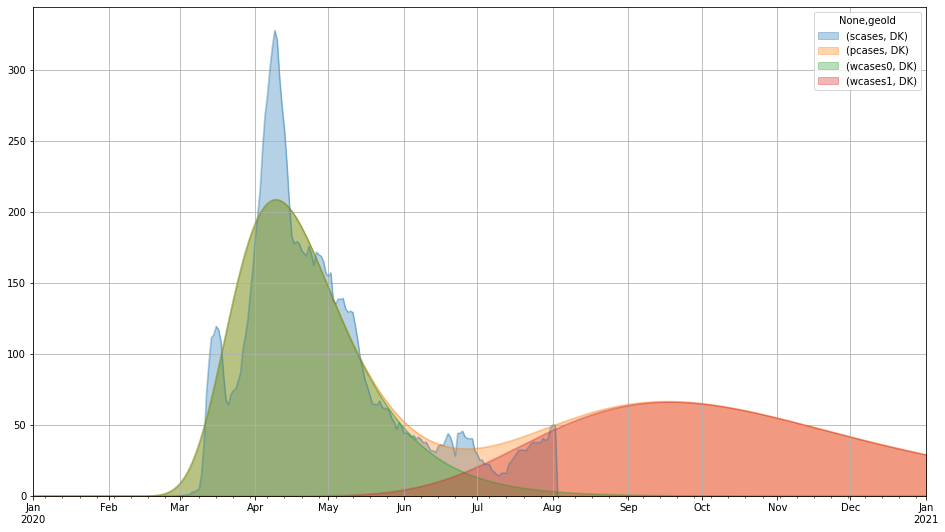

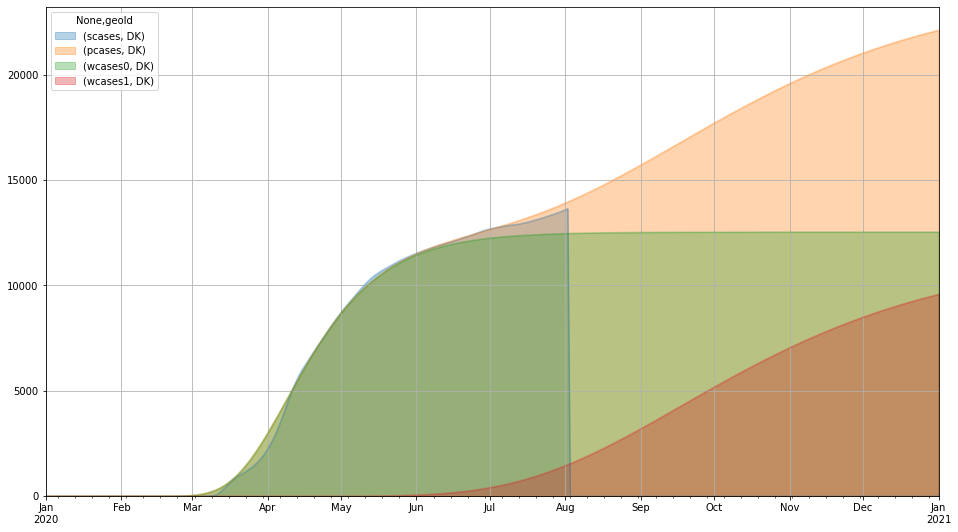

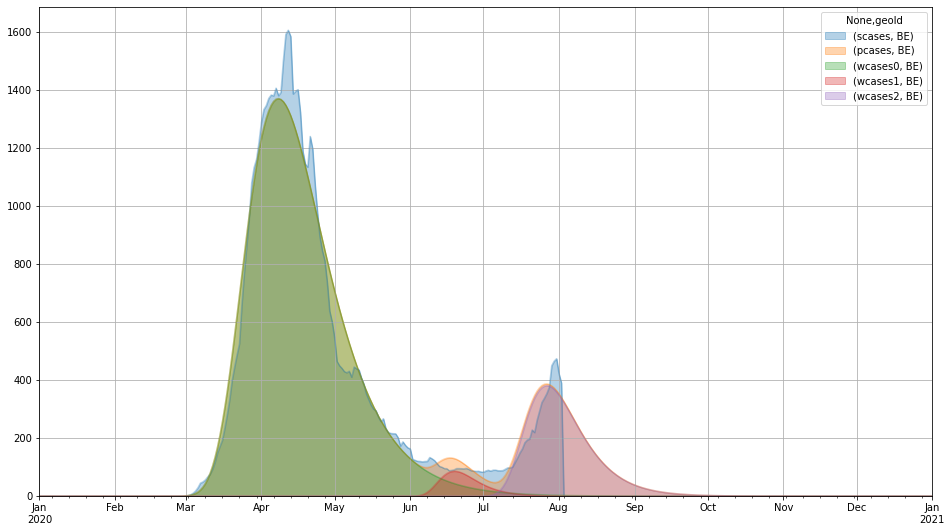

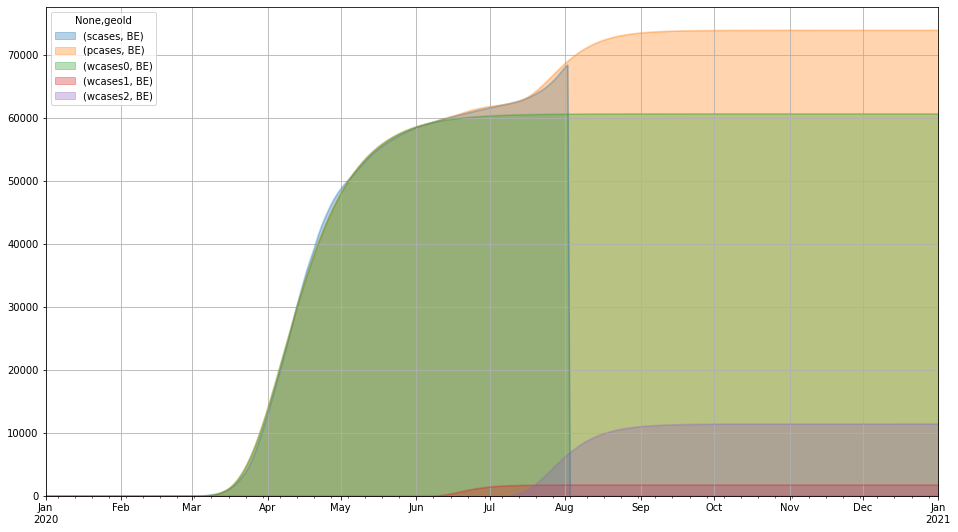

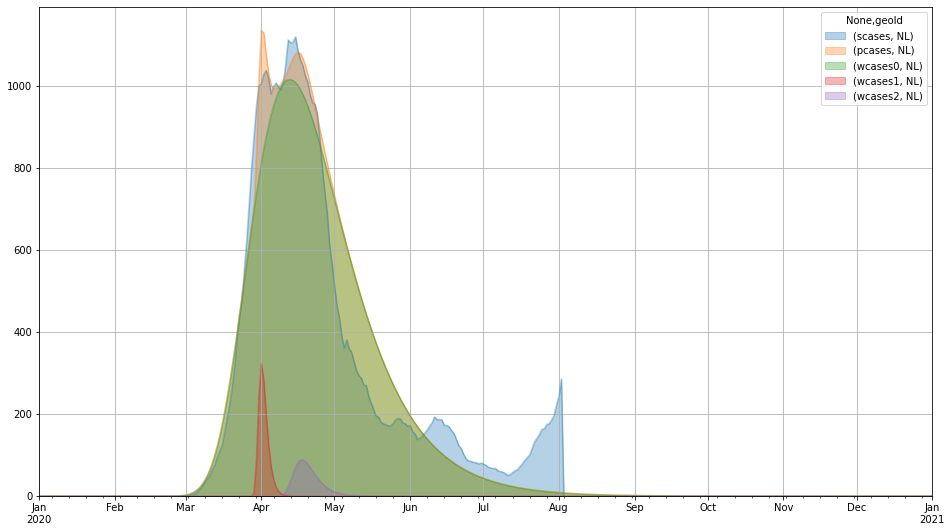

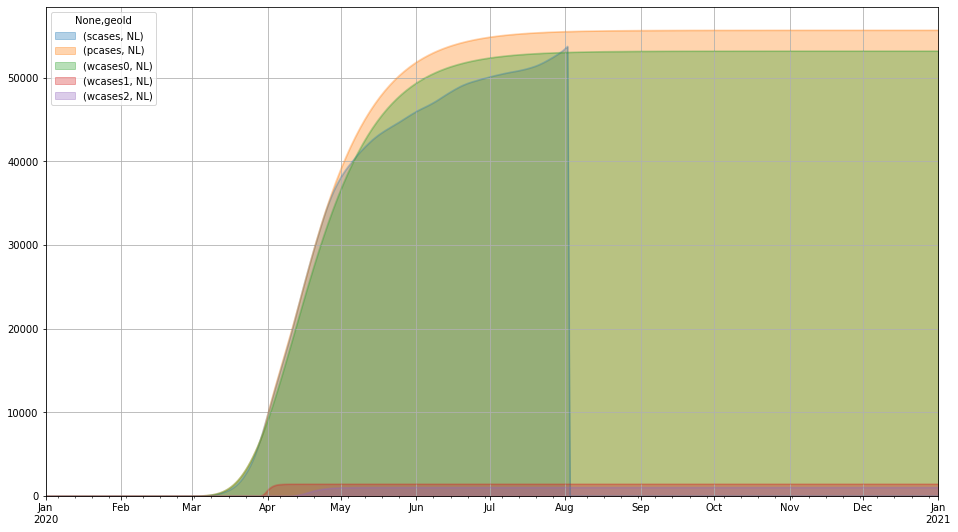

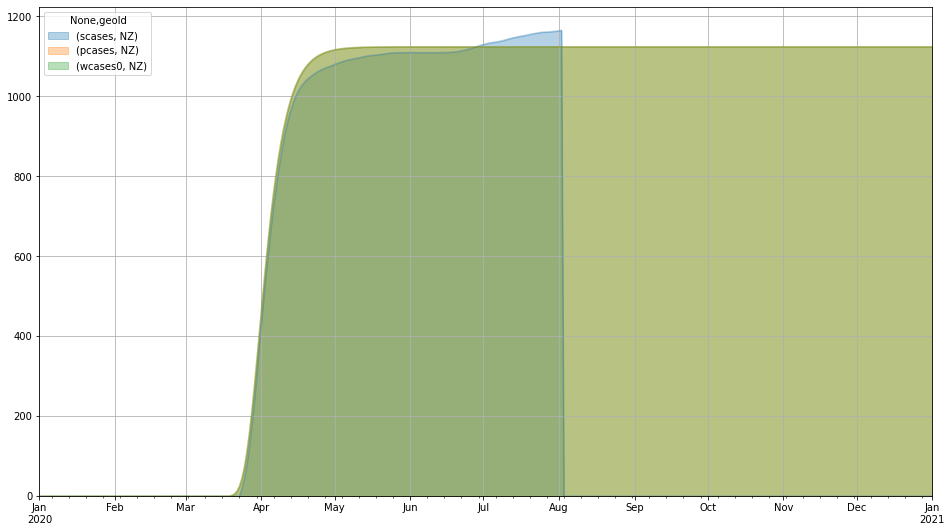

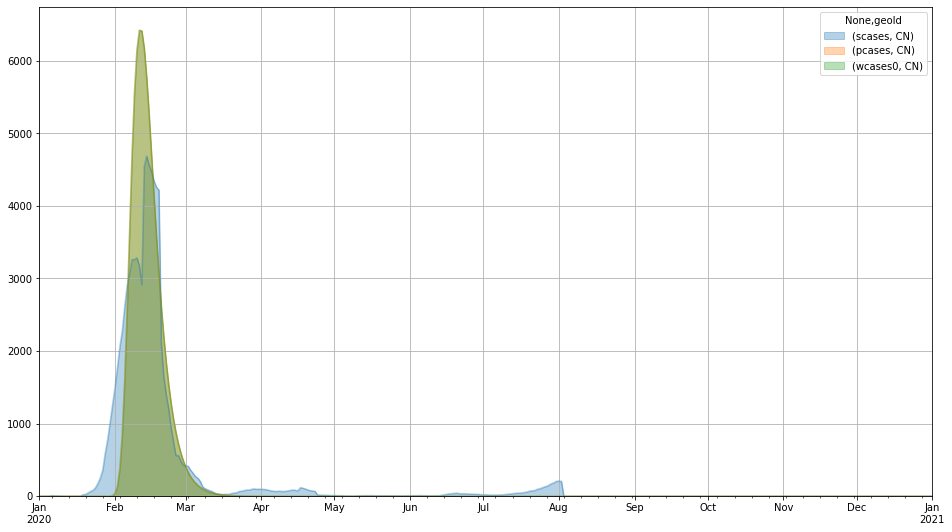

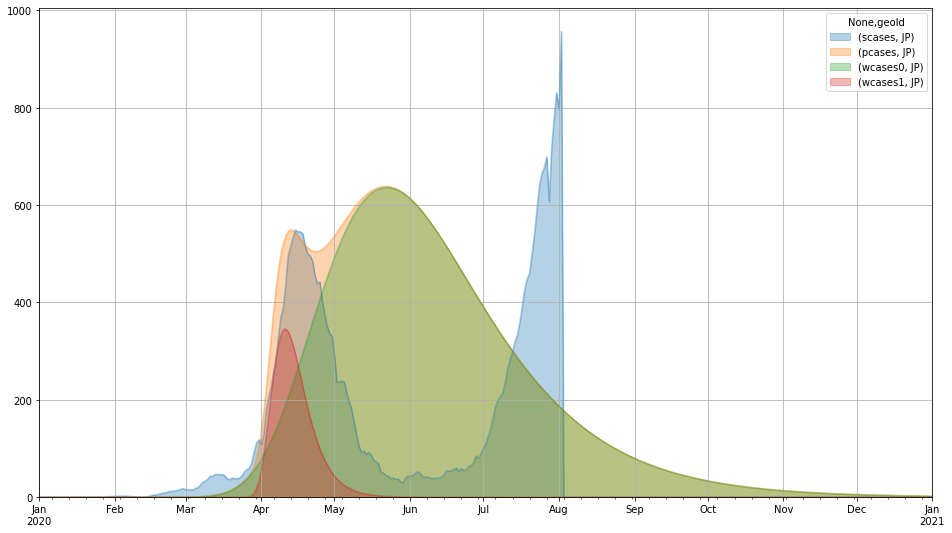

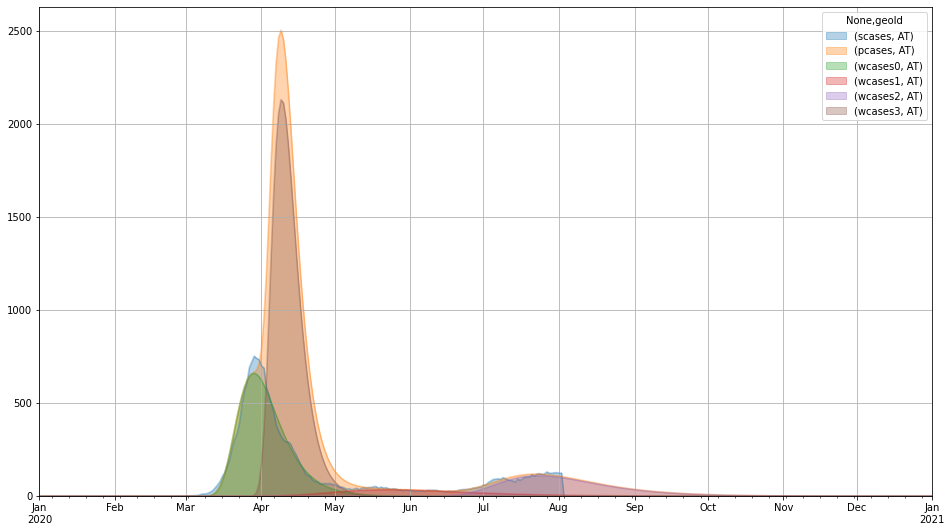

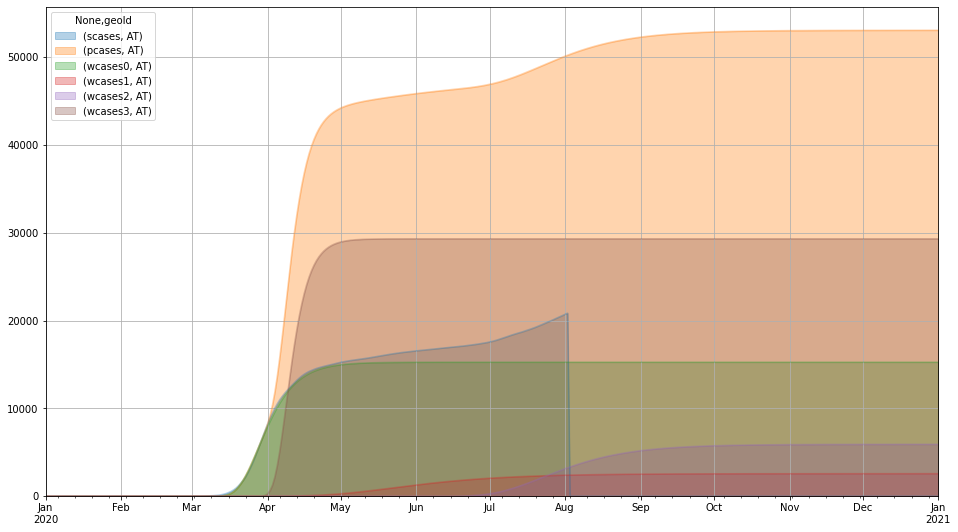

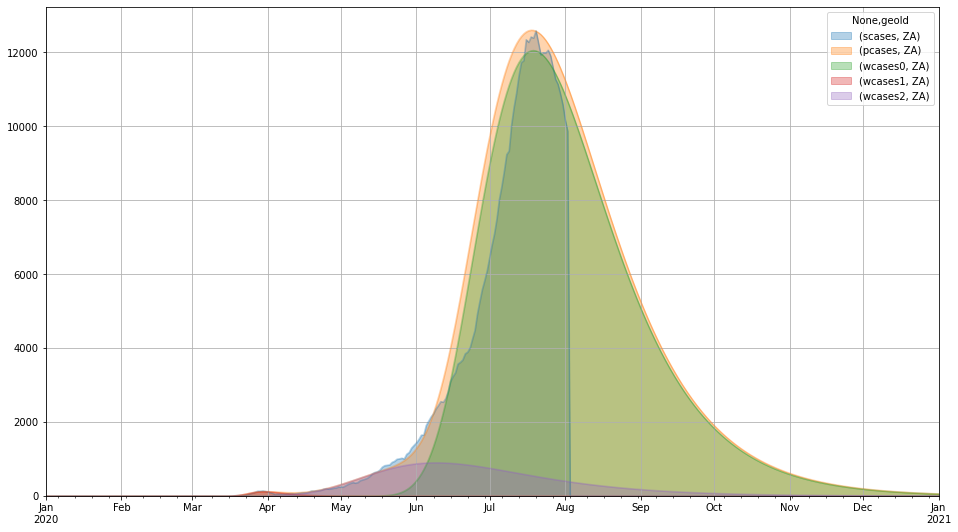

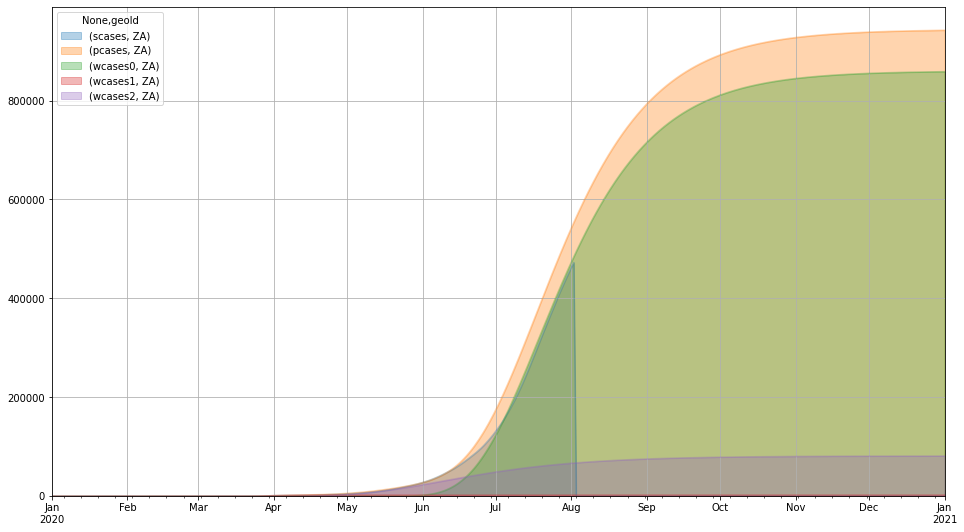

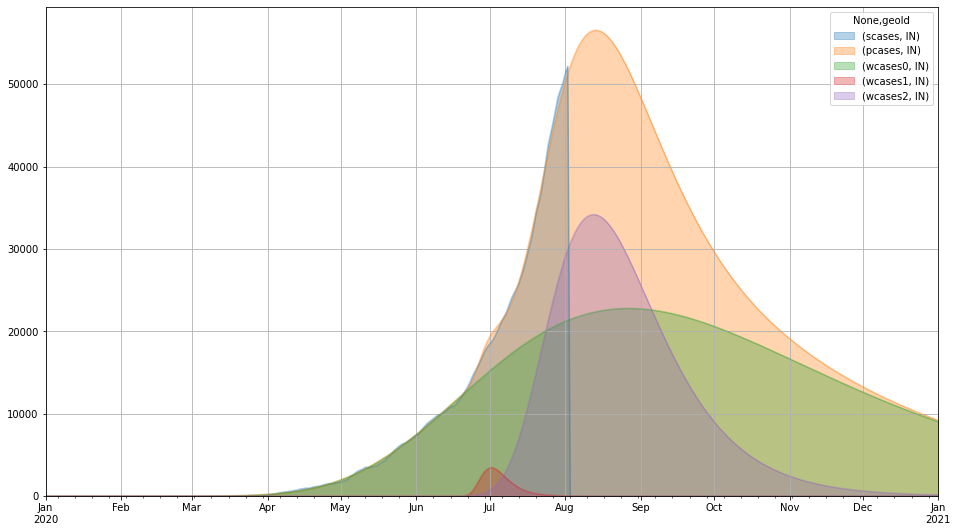

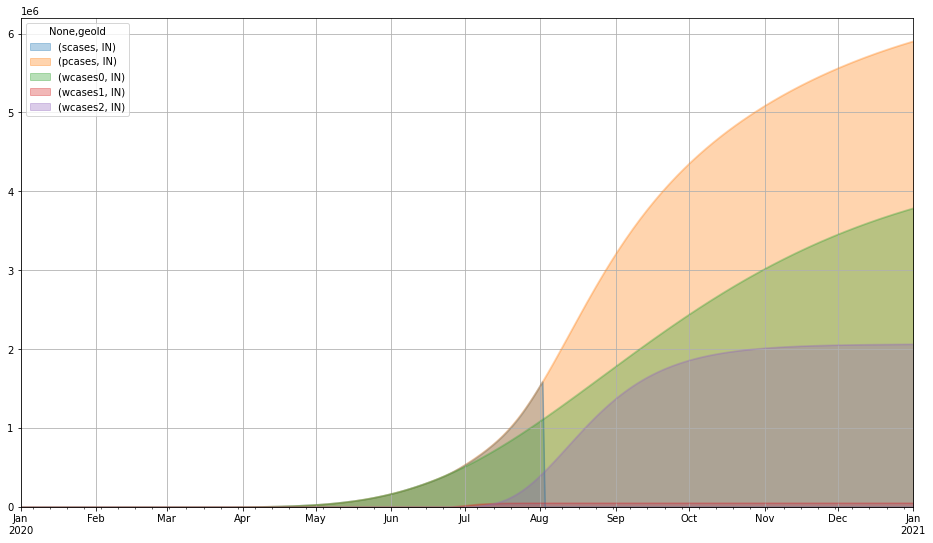

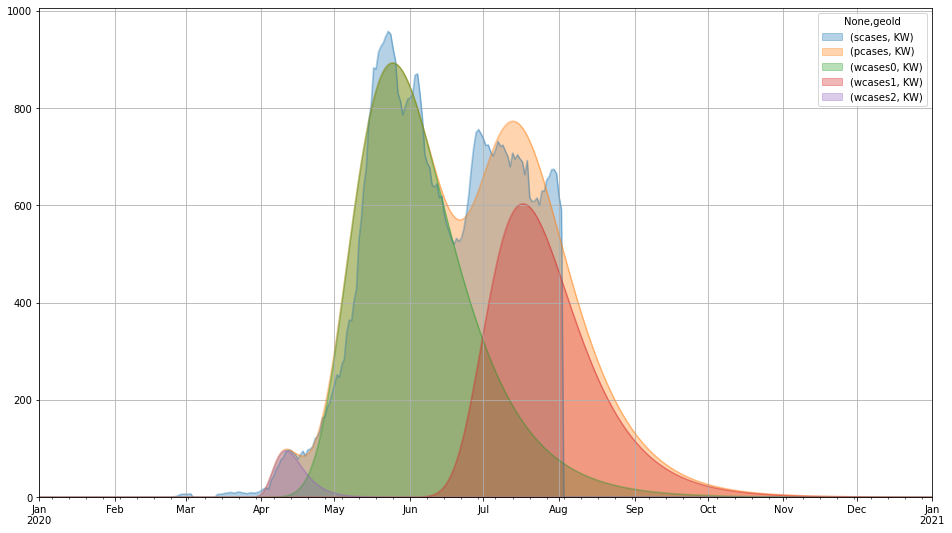

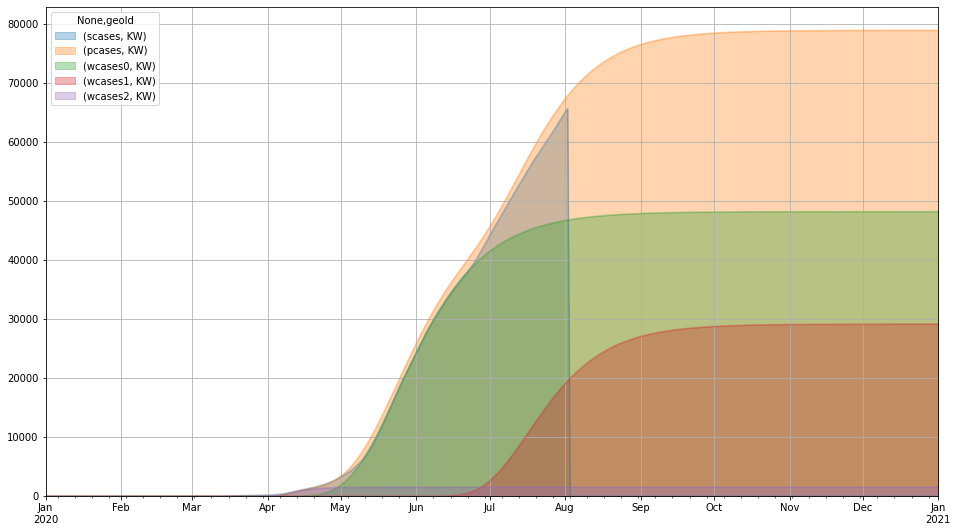

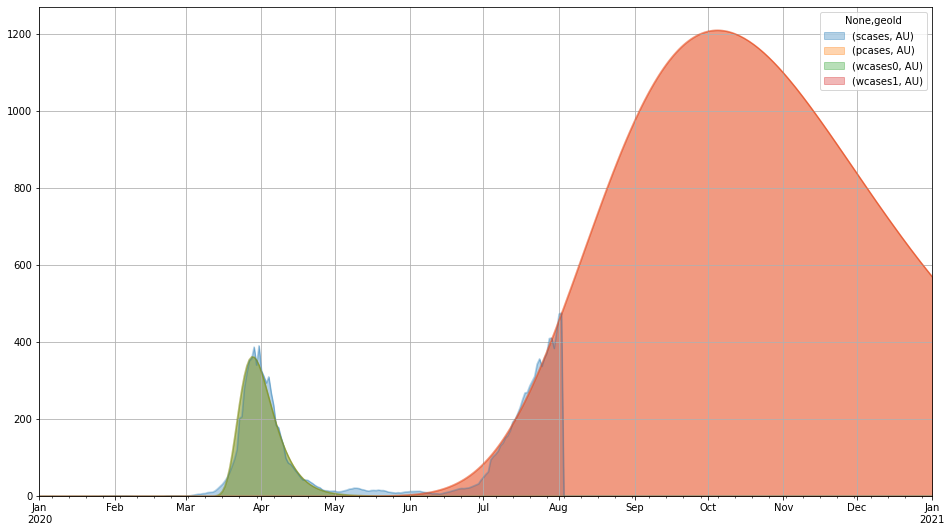

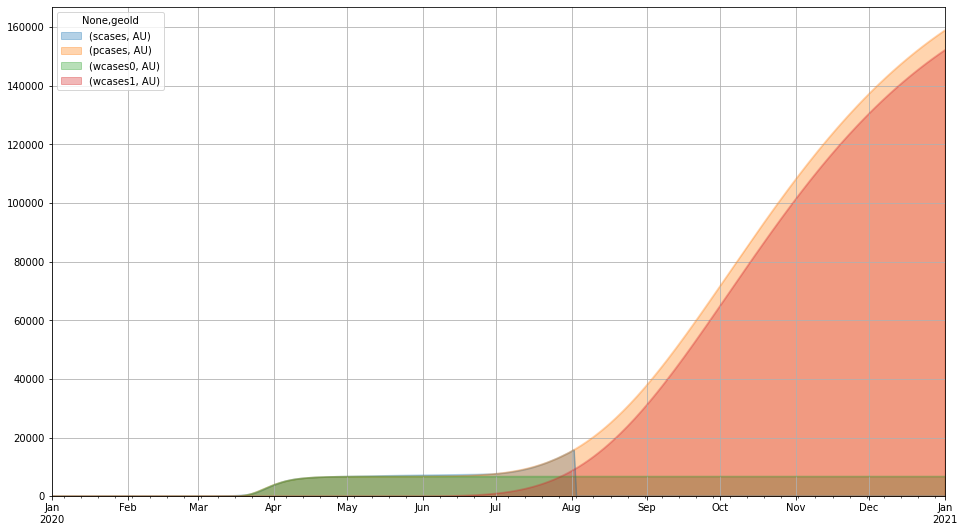

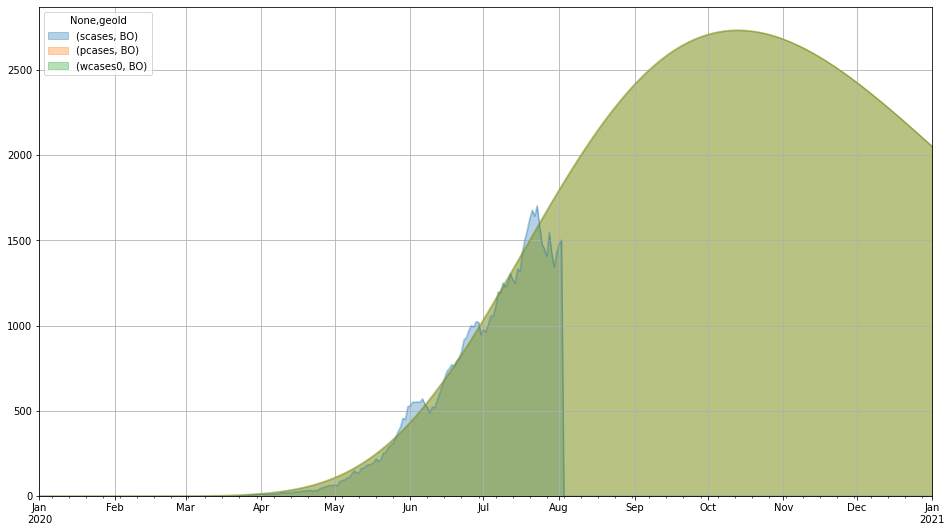

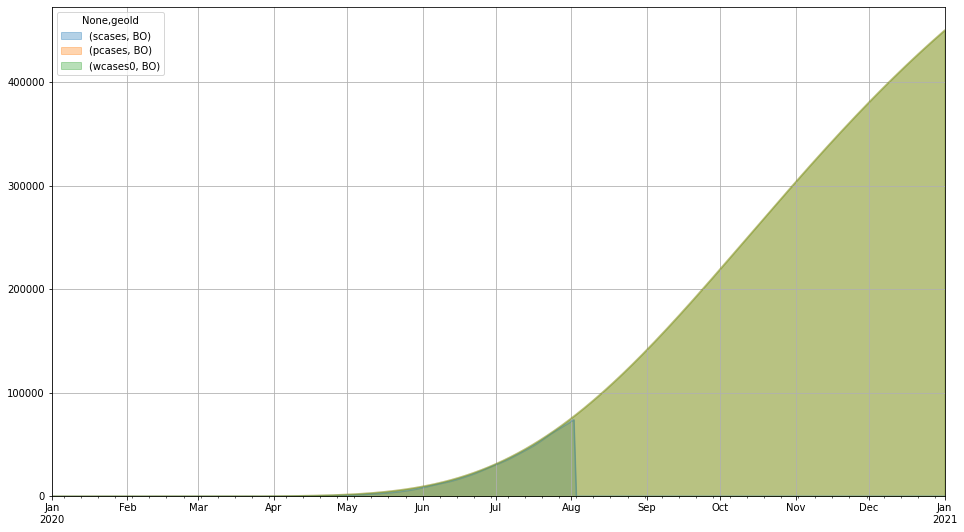

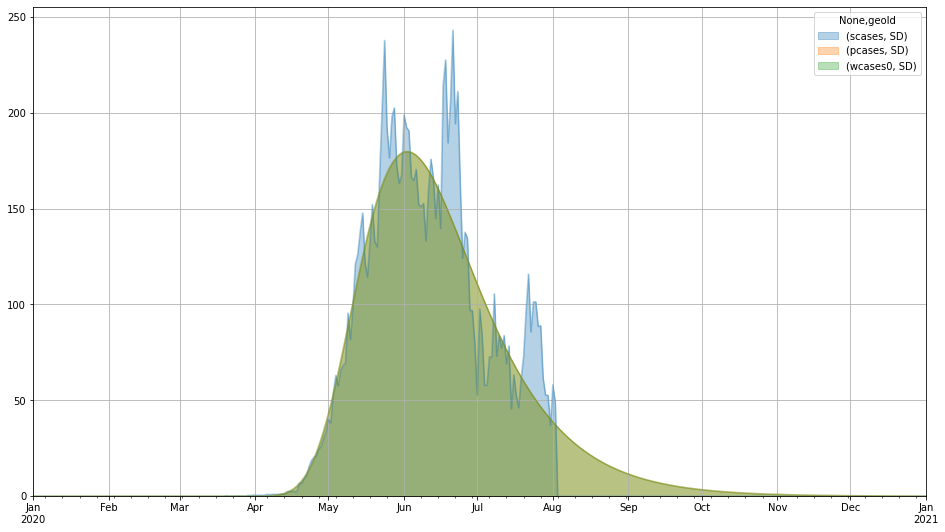

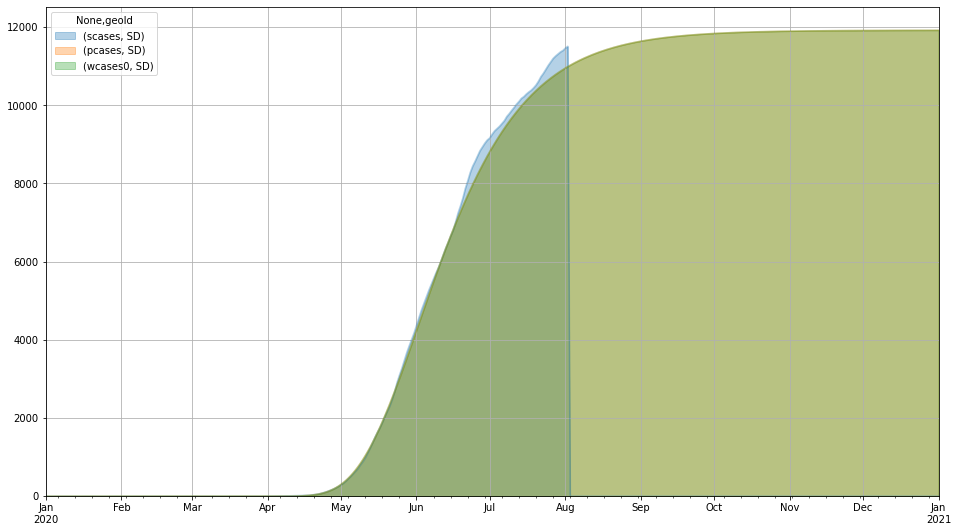

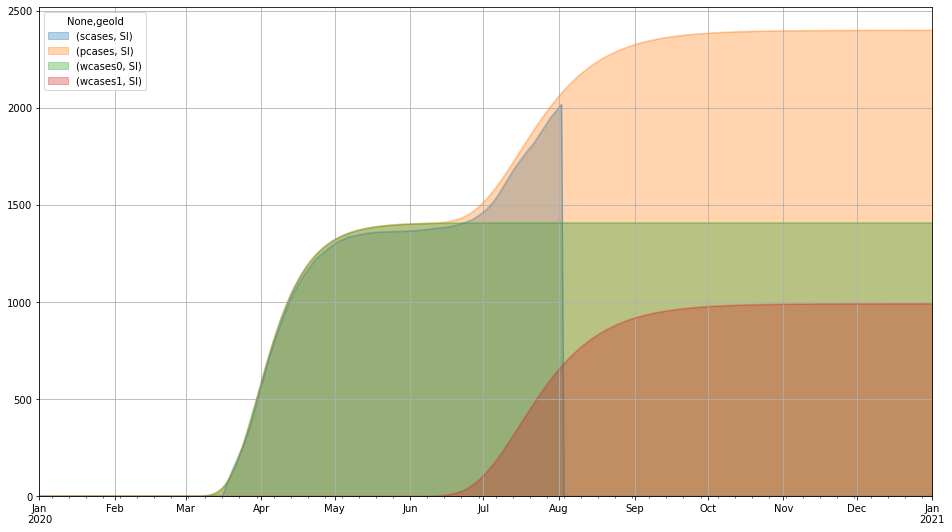

In [94]:
# Select countries to fit.
#countries = np.sort(df['geoId'].unique())
countries = ['RS', 'IL', 'US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE',
             'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT', 'ZA', 'IN', 'KW',
             'AU', 'BO', 'SD', 'SI']
#countries = ['BB', 'BI', 'BM', 'BZ', 'CF', 'IS', 'JE', 'LV', 'ML', 'NO', 'PF', 'VC']

# Choose whether to output plots per country.
showplots = True

measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

for country in countries:

    wave = 0

    df_geo[(pmeasure, country)] = 0
    df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()
    df_geo[(rmeasure, country)] = df_geo[smeasure][country]

    plotlist = [(smeasure, country), (pmeasure, country)]

    countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 10
    #mincases = df_geo[smeasure][country].sum() / 5000
    mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for {} ({}) with population {:1.0f}'.format(
        countryname, country, popdata))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        # Create potential wave
        curwave = wmeasure + str(wave)
        df_geo[(curwave, country)] = 0

        # Create a dataframe for predictions
        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][country]})

        # Create the Gumbel division and select suitable measures
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] >= mincases)]

        # Reduce to log scale and select relevant measures
        df_pred['linear'] = np.log(df_pred['gumdiv'])
        #df_pred = df_pred[(df_pred['linear'] < -0) &
        #                  (df_pred['linear'] > -99)]

        # Do we still have data left?
        if len(df_pred) <= 1:
            print('--- no data left')
            break

        # Create input vectors for regression splines and build a model
        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        eamodel = Earth(minspan=0)
        eamodel.fit(eax, eay)

        # Store the results
        df_pred['earth'] = eamodel.predict(eax)

        # Find the day range
        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        # Find the gradient of generated regression splines
        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        # Knots are found when the gradient changes, including start and end
        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))

        # Starting day of each spline
        df_pred['daycnt'] = df_pred.reset_index().index

        # Select the knots and find the actual number of days for each spline
        df_knot = df_pred[df_pred['knot']][['daynum', 'daycnt', 'linear', 'eagrad']]

        df_knot['numdays'] = df_knot['daynum'].shift(-1) - df_knot['daynum']
        df_knot['cntdays'] = df_knot['daycnt'].shift(-1) - df_knot['daycnt']
        df_knot['intline'] = df_knot['linear'].shift(-1) - df_knot['linear']

        # Candidate knots have a negative gradient and 5 or more days
        df_knot['cand'] = ((df_knot['eagrad'] < 0) &
                           (df_knot['cntdays'] >= 5))

        # We want early knots with a low gradient and many days
        #df_knot['since'] = df_knot['daynum'] - daymin
        #df_knot['score'] = df_knot['intline'] * df_knot['eagrad'] / -df_knot['linear']
        df_knot['score'] = - df_knot['intline'] * df_knot['cntdays']
        #df_knot['score'] = (df_knot['intline'] ** 2) + (df_knot['cntdays'] ** 2)
        
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        # Did we find another wave?
        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data left')
            break

        # Find the interval of the selected spline
        lower = choice['daynum'].values[0]
        upper = choice['numdays'].values[0] + lower
        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        # Calculate slope and intercept as basis for beta and mu
        fitmod = export.export_python_function(eamodel)
        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)
        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        # Apply the Gumbel PDF according to beta and mu and find the scale
        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']
        final = df_pred['scale'].mean()

        print('Wave {:1.0f} beta {:6.3f} with mu {:3.0f} from {:3.0f} to {:3.0f} for {:1.0f}'.format(
            wave, beta, mu, lower, upper, final))

        # Calculate the current wave and move the data from remainder to prediction
        df_geo[(curwave, country)] = final * gumpdf(df_geo['daynum'], beta, mu)
        df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
        df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
        plotlist += [(curwave, country)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200101':'20210101'].plot(
            figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

        df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
            figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [95]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 90.50% of 2399


The peak can be found at the first predicted value that is larger than the next.

In [96]:
peak = df_geo[df_geo[(pmeasure, country)] == df_geo[(pmeasure, country)].max()].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-03-31


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [97]:
print('Peak by last mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by last mu at 2020-07-16


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [98]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-05-17


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [99]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-11


We define the maximum delta as the day in the curve with the sharpest rise.

In [100]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 3 on 2020-03-20


This should match the maximum gradient of the daily data.

In [101]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 3


Back to the original curve, showing the number of infected concurrently.

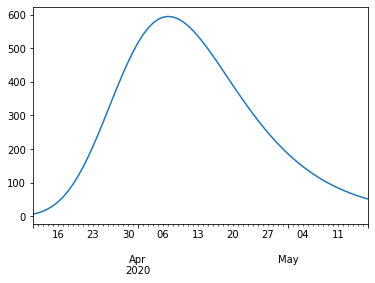

In [102]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [103]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 595


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

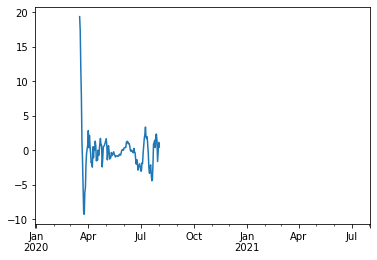

In [104]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [105]:
df_geo.reset_index(inplace=True)
df_geo.melt(id_vars=['index'], value_vars=['pcases']).to_csv('zzcorwmc.csv')

Keep exploring! Stay home, wash your hands, keep your distance.